<a href="https://colab.research.google.com/github/j-claudinei-f/j-claudinei-f/blob/main/Sierpinski_Pascal_Triangulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Os triângulos de Pascal e de Sierpinski**

José Claudinei Ferreira

Universidade Federal de Alfenas

**O triângulo de Pascal e produtos notáveis**

Quando lidamos com os produtos $$(a+b)^n,\qquad n\in \mathbb{N},\qquad a+b\neq 0,$$
por exemplo,
$$\begin{cases}(a+b)^0&=&1\\\\(a+b)^1&=&a+b\\\\(a+b)^2&=&a^2+2ab+b^2\\\\(a+b)^3&=&a^3+3a^2b+3ab^2+b^3\\\\\vdots&\vdots&\vdots\end{cases},$$ obtemos uma lista de números que possuem uma relação
$$\begin{cases}1&\\
1&1\\1&2&1\\1&3&3&1\\\vdots&\vdots&\vdots&\vdots&\ddots\end{cases}$$

É essa tabela que usualmente chamamos de [triângulo de Pascal](https://en.wikipedia.org/wiki/Pascal%27s_triangle) (mas ele foi também estudado por [Tartaglia](https://pt.wikipedia.org/wiki/Niccol%C3%B2_Fontana_Tartaglia)).

O número $$\frac{n!}{k!(n - k)!} = \binom{n}{k},$$ na linha $n$ e na coluna $k$ é o [número de combinações](https://pt.wikipedia.org/wiki/Combina%C3%A7%C3%A3o) de $n$ elementos de um conjunto, tomados $k$ a $k$ e seguem a relação $$ \binom{n}{k}=\binom{n-1}{k-1}+\binom{n-1}{k}.$$

Vejamos uma parte do triângulo de Pascal e Tartaglia.

In [145]:
n=10                # Pode trocar n e cliar no play.
A=np.zeros((n,n))
T=np.zeros((n,n))
A[1,1]=1
T[1,1]=1
for i in range(0,n):
  T[i,0]=1         # Triângulo de Pascal
  A[i,0]=1         # Guardando pares e ímpares
for i in range(2,n):
  for j in range(1,n):
    T[i,j]=T[i-1,j-1]+T[i-1,j]
    A[i,j]=(A[i-1,j-1]+A[i-1,j])%2 # Guardando pares e ímpares
    import pandas as pd

df = pd.DataFrame(T)
df

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,4.0,6.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0
5,1.0,5.0,10.0,10.0,5.0,1.0,0.0,0.0,0.0,0.0
6,1.0,6.0,15.0,20.0,15.0,6.0,1.0,0.0,0.0,0.0
7,1.0,7.0,21.0,35.0,35.0,21.0,7.0,1.0,0.0,0.0
8,1.0,8.0,28.0,56.0,70.0,56.0,28.0,8.0,1.0,0.0
9,1.0,9.0,36.0,84.0,126.0,126.0,84.0,36.0,9.0,1.0


Não vou delongar, mas isso está ligado ao [teorema binomial de Newton](https://en.wikipedia.org/wiki/Binomial_theorem#Newton's_generalized_binomial_theorem).

#**Construindo uma imagem**

Na tabela acima, podemos pintar os números pares e os ímpares de cores diferentes como se fossem [pixels](https://pt.wikipedia.org/wiki/Pixel).

In [1]:
from PIL import Image
import numpy as np

# Criar um array com zeros
n=2**8
data = np.zeros((n,n,3), dtype=np.uint8)
# Criar a imagem a partir do array

A=np.zeros((n,n))
T=np.zeros((n,n))
A[1,1]=1
T[1,1]=1
for i in range(0,n):
  T[i,0]=1         # Triângulo de Pascal
  A[i,0]=1         # Guardando pares e ímpares
for i in range(2,n):
  for j in range(1,n):
    T[i,j]=T[i-1,j-1]+T[i-1,j]
    A[i,j]=(A[i-1,j-1]+A[i-1,j])%2 # Guardando restos da disvisão por 2.
                                   # Separando pares e ímpares.
# Modificar o array para ter cor
for i in range(0,n):
  for j in range(0,n):
    if A[i,j]==1:
      data[i,j] = [255, 0, 0] # vermelho
    else: data[i,j] = [255,255, 255] # branco


img = Image.fromarray(data, 'RGB')

# Salvar a imagem em um arquivo
img.save('minha_imagem.jpg')

In [2]:
import matplotlib.pyplot as plt                  # para fazer gráficos.

Aproximação do triângulo de Sierpinski


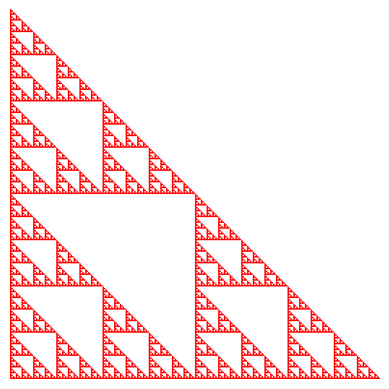

In [3]:
print('Aproximação do triângulo de Sierpinski')
plt.imshow(img)
plt.axis('off')
plt.show()

A imagem acima é uma aproximação do triângulo de [Sierpinski](https://pt.wikipedia.org/wiki/Tri%C3%A2ngulo_de_Sierpinski).

#**Construindo outras imagens**

Na tabela acima, nós pintamos os números pares e os ímpares de cores diferentes como se fossem [pixels](https://pt.wikipedia.org/wiki/Pixel).

Podemos usar a idea e pintar de uma cor os múltiplos de 3 e os outros números de outra cor, por exemplo:

In [6]:
# Criar um array com zeros
n=3**6                         # Potências de 3.
data = np.zeros((n,n,3), dtype=np.uint8)
# Criar a imagem a partir do array

A=np.zeros((n,n))
T=np.zeros((n,n))
A[1,1]=1
T[1,1]=1
for i in range(0,n):
  T[i,0]=1         # Triângulo de Pascal
  A[i,0]=1         # Guardando pares e ímpares
for i in range(2,n):
  for j in range(1,n):
    T[i,j]=T[i-1,j-1]+T[i-1,j]
    A[i,j]=(A[i-1,j-1]+A[i-1,j])%3 # Guardando restos da divisão por 3.

# Modificar o array para ter cor
for i in range(0,n):
  for j in range(0,n):
    if A[i,j]==1 or A[i,j]==2:
      data[i,j] = [255,0,0] # vermelho
    else: data[i,j] = [255,255,255] # branco


img = Image.fromarray(data, 'RGB')

# Salvar a imagem em um arquivo
img.save('minha_imagem.jpg')

Aproximação de imagem


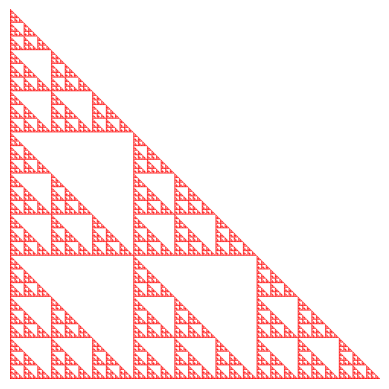

In [7]:
print('Aproximação de imagem')
plt.imshow(img)
plt.axis('off')
plt.show()